## Observations and Insights 

In [3]:
#
#Author T. Brafdord 
#June 2021

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.

#length to get unique number of mice
unique_mouse_count_df = len(combined_mouse_df["Mouse ID"].unique())

#length to get total number of entries
mouse_count_df = len(combined_mouse_df["Mouse ID"])

#create Dataframe using dictionary of list
total_mouse_df = pd.DataFrame({"Total Number of Mouse ID": [mouse_count_df], "Unique Number of Mouse ID": [unique_mouse_count_df]})

#display
total_mouse_df

,Total Number of Mouse ID,Unique Number of Mouse ID
0,1893,249


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#retrieve entries that are duplicated in both the Mouse ID and Timepoints 
mouse_id_timepoint_df = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

#display
mouse_id_timepoint_df


array(['g989'], dtype=object)

In [29]:
repeated_id = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989"]
repeated_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [35]:
# Optional: Get all the data for the duplicate mouse ID. 

#retrieve Mouse ID duplicates
duplicate_mouse_df = combined_mouse_df[combined_mouse_df["Mouse ID"].isin(mouse_id_timepoint_df)==False]

#display
duplicate_mouse_df




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [41]:
# Checking the number of mice in the clean DataFrame.

#length to get total number of entries in clean data
new_mouse_count_df = len(duplicate_mouse_df["Mouse ID"].unique())

#create Dataframe
clean_mouse_count_df = pd.DataFrame({"Clean Data Mice Count": [new_mouse_count_df]})

#set new index to Clean Data Mice Count
clean_mouse_count_df = clean_mouse_count_df.set_index("Clean Data Mice Count")

#display
clean_mouse_count_df


""
Clean Data Mice Count
248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#group data by Drug 
drug_df = combined_mouse_df.groupby("Drug Regimen")

#calculate mean, median, variance, standard deviation, and SEM of the tumor volume
drug_mean = drug_df["Tumor Volume (mm3)"].mean()
drug_median = drug_df["Tumor Volume (mm3)"].median()
drug_variance = drug_df["Tumor Volume (mm3)"].var()
drug_std = drug_df["Tumor Volume (mm3)"].std()
drug_sem = drug_df["Tumor Volume (mm3)"].sem()

#create Dataframe
stat_table_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance":drug_variance, "standard deviation": drug_std, "Standard Error of the Mean":drug_sem})

#display
stat_table_df


,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_df = stat_table_df.aggregate(["Capomulin", "Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"])

#display
aggregation_df


,Mean,Median,Variance,standard deviation,Standard Error of the Mean
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [11]:
#count drug regimen
drug_count = combined_mouse_df["Drug Regimen"].value_counts()

#create Dataframe to get drug rerimen counts
drug_total_df = pd.DataFrame({"Drug Regimen Count": drug_count})

#display
drug_total_df


,Drug Regimen Count
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,161


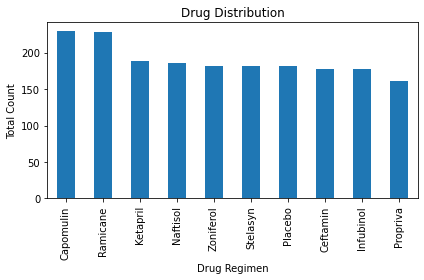

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#plot chart with title and labels
drug_chart = drug_count.plot(kind = "bar", width = 0.5, title = "Drug Distribution")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Total Count")
plt.tight_layout()



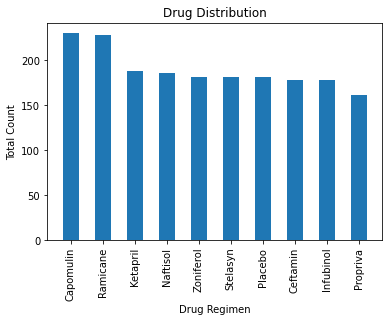

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Set the x_axis
x_axis = np.arange(len(drug_count))

#plot chart with title and labels
plt.bar(x_axis, drug_count, width = 0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")
plt.title("Drug Distribution")

# Label the tick marks 
tick_locations = [total for total in x_axis]
plt.xticks(tick_locations, drug_count.index.values)
plt.xticks(rotation = "vertical")

# Display
plt.show()
plt.tight_layout()

In [14]:
#count by sex and calculate percentage 
gender_both = combined_mouse_df.loc[:"Sex"]
gender_grand_total = gender_both.count()["Sex"]
gender_count = combined_mouse_df["Sex"].value_counts()
gender_percent = gender_count / gender_grand_total * 100

#create Dataframe to get gender count and percentage
gender_total_df = pd.DataFrame({"Drug Regimen Count": gender_count, "Drug Regimen Percentage": gender_percent})
gender_total_df["Drug Regimen Percentage"] = gender_total_df["Drug Regimen Percentage"].map("{0:.2f}%".format)

gender_total_df

,Drug Regimen Count,Drug Regimen Percentage
Male,958,50.61%
Female,935,49.39%


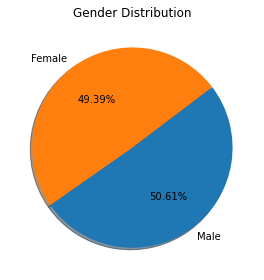

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Plot chart
pie_plot = gender_count.plot(kind = "pie", autopct="%1.2f%%", shadow = True, startangle=215, title="Gender Distribution")

#remove "sex" labeling by displaying nothing 
pie_plot.set_ylabel("")
plt.tight_layout()

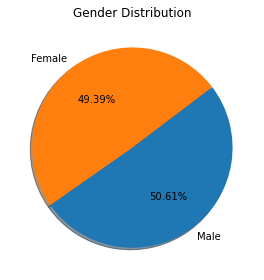

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#Plot chart
plt.pie(gender_count, labels=gender_count.index.values, autopct="%1.2f%%", startangle=215, shadow = True)
plt.title("Gender Distribution")

#display
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
variable = dataset
isin([Capomulin, Ramicane, Infubinol, and Ceftamin] == True)
# Start by getting the last (greatest) timepoint for each mouse
groupby([id) (timepoint).max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




In [18]:
# Put treatments into a list for for loop (and later for plot labels)
for x in y Drug Regimen
plt.boxplot(data)
xlabel
# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [20]:
#find a mouse

#find mouse z969 by. loc on Mouse ID column
single_mouse = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "z969"]

#display for reference
single_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1883,z969,Naftisol,Male,9,30,0,45.000000,0
1884,z969,Naftisol,Male,9,30,5,49.332999,0
1885,z969,Naftisol,Male,9,30,10,52.656081,1
1886,z969,Naftisol,Male,9,30,15,54.713005,2
1887,z969,Naftisol,Male,9,30,20,57.898778,2
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


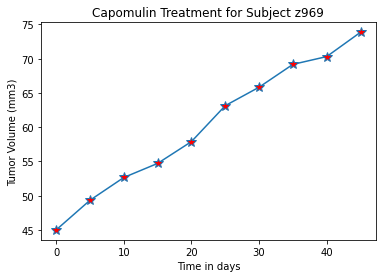

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Plot chart and add labels and title 
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"], marker = "*", markerfacecolor = "red", markersize = 10,)
plt.xlabel("Time in days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Subject z969")

# Display plot
plt.show()
plt.tight_layout()

In [22]:

# Isolate cases that only use the Capomulin regimen
capomulin_df = combined_mouse_df.loc[combined_mouse_df['Drug Regimen'] == 'Capomulin']

#display for reference
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
